# Exploratory Data Analysis (EDA)
## PC Component Compatibility Transactions

This notebook explores the processed transactional dataset generated from
PC hardware specifications. The goal of EDA is to understand item frequencies,
co-occurrence patterns, and transaction structure before applying association
rule mining algorithms.

In [44]:
import pandas as pd

df = pd.read_csv("../data/processed_data.csv")
print("Shape:", df.shape)
df.head()

Shape: (6000, 189)


,CPU_Producer:AMD,CPU_Producer:Intel,CPU_Socket:1151,CPU_Socket:1200,CPU_Socket:1700,CPU_Socket:2011-V3,CPU_Socket:2066,CPU_Socket:AM4,CPU_Socket:AM5,CPU_Socket:FM2+,...,RAM_Producer:Thermaltake,RAM_Size:128GB+,RAM_Size:16GB,RAM_Size:32GB,RAM_Size:4GB,RAM_Size:64GB,RAM_Size:8GB,RAM_Size:nan,RAM_Type:DDR4,RAM_Type:DDR5
0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [45]:
print("Number of transactions:", df.shape[0])
print("Number of unique items:", df.shape[1])

Number of transactions: 6000
Number of unique items: 189


In [46]:
sparsity = 1 - df.sum().sum() / (df.shape[0] * df.shape[1])
print(f"Sparsity: {sparsity:.2f}")


Sparsity: 0.92


In [47]:
# Sum of each column = number of transactions containing that item
item_support = df.sum().sort_values(ascending=False)

# Top 20 most frequent items
print(item_support.head(20))

MB_Memory:DDR4          5494
RAM_Type:DDR4           5494
CPU_Producer:Intel      3906
CPU_TDP:<=65W           2923
GPU_TDP:151-250W        2739
RAM_Producer:G.Skill    2317
GPU_VRAM:8GB            2228
RAM_Size:16GB           2131
CPU_Producer:AMD        2094
RAM_Producer:Corsair    2042
MB_Producer:ASUS        1949
PSU_Watt:601-750W       1918
GPU_TDP:<=150W          1854
RAM_Size:32GB           1783
PSU_Watt:451-600W       1541
MB_Producer:MSI         1349
GPU_Producer:ASUS       1341
CPU_Socket:1151         1339
MB_Socket:1151          1339
GPU_VRAM:12GB           1296
dtype: int64


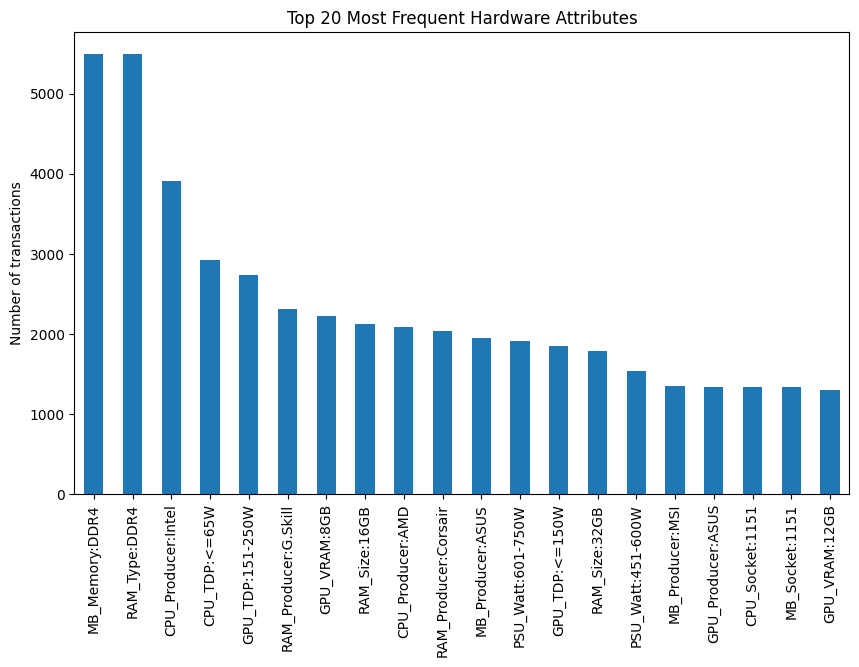

In [48]:
import matplotlib.pyplot as plt

top_items = item_support.head(20)
plt.figure(figsize=(10,6))
top_items.plot(kind='bar')
plt.xticks(rotation=90)
plt.ylabel("Number of transactions")
plt.title("Top 20 Most Frequent Hardware Attributes")
plt.show()

In [49]:
categories = ['CPU_', 'MB_', 'RAM_', 'GPU_', 'PSU_']

for cat in categories:
    cat_items = [col for col in df.columns if col.startswith(cat)]
    cat_support = df[cat_items].sum().sort_values(ascending=False)
    print(f"\nTop items for {cat}:\n", cat_support.head(5))



Top items for CPU_:
 CPU_Producer:Intel    3906
CPU_TDP:<=65W         2923
CPU_Producer:AMD      2094
CPU_Socket:1151       1339
CPU_Socket:AM4        1275
dtype: int64

Top items for MB_:
 MB_Memory:DDR4      5494
MB_Producer:ASUS    1949
MB_Producer:MSI     1349
MB_Socket:1151      1339
MB_Socket:AM4       1275
dtype: int64

Top items for RAM_:
 RAM_Type:DDR4           5494
RAM_Producer:G.Skill    2317
RAM_Size:16GB           2131
RAM_Producer:Corsair    2042
RAM_Size:32GB           1783
dtype: int64

Top items for GPU_:
 GPU_TDP:151-250W     2739
GPU_VRAM:8GB         2228
GPU_TDP:<=150W       1854
GPU_Producer:ASUS    1341
GPU_VRAM:12GB        1296
dtype: int64

Top items for PSU_:
 PSU_Watt:601-750W        1918
PSU_Watt:451-600W        1541
PSU_Producer:Seasonic     822
PSU_Watt:<=450W           819
PSU_Producer:Corsair      809
dtype: int64


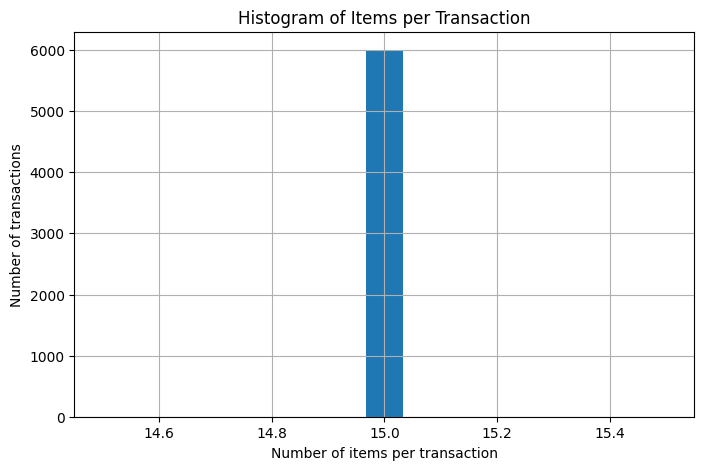

In [50]:
plt.figure(figsize=(8,5))
(df.sum(axis=1)).hist(bins=15)
plt.xlabel("Number of items per transaction")
plt.ylabel("Number of transactions")
plt.title("Histogram of Items per Transaction")
plt.show()


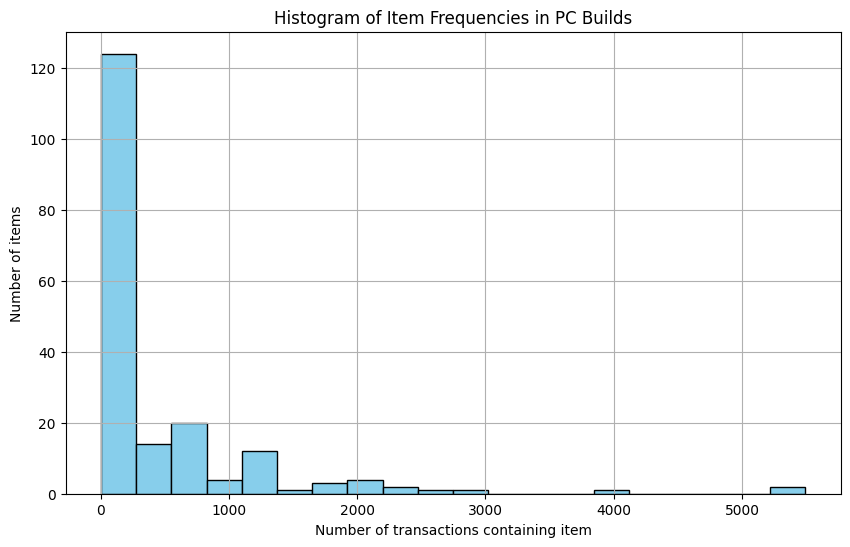

In [51]:
plt.figure(figsize=(10,6))
df.sum(axis=0).hist(bins=20, color='skyblue', edgecolor='black')
plt.xlabel("Number of transactions containing item")
plt.ylabel("Number of items")
plt.title("Histogram of Item Frequencies in PC Builds")
plt.show()

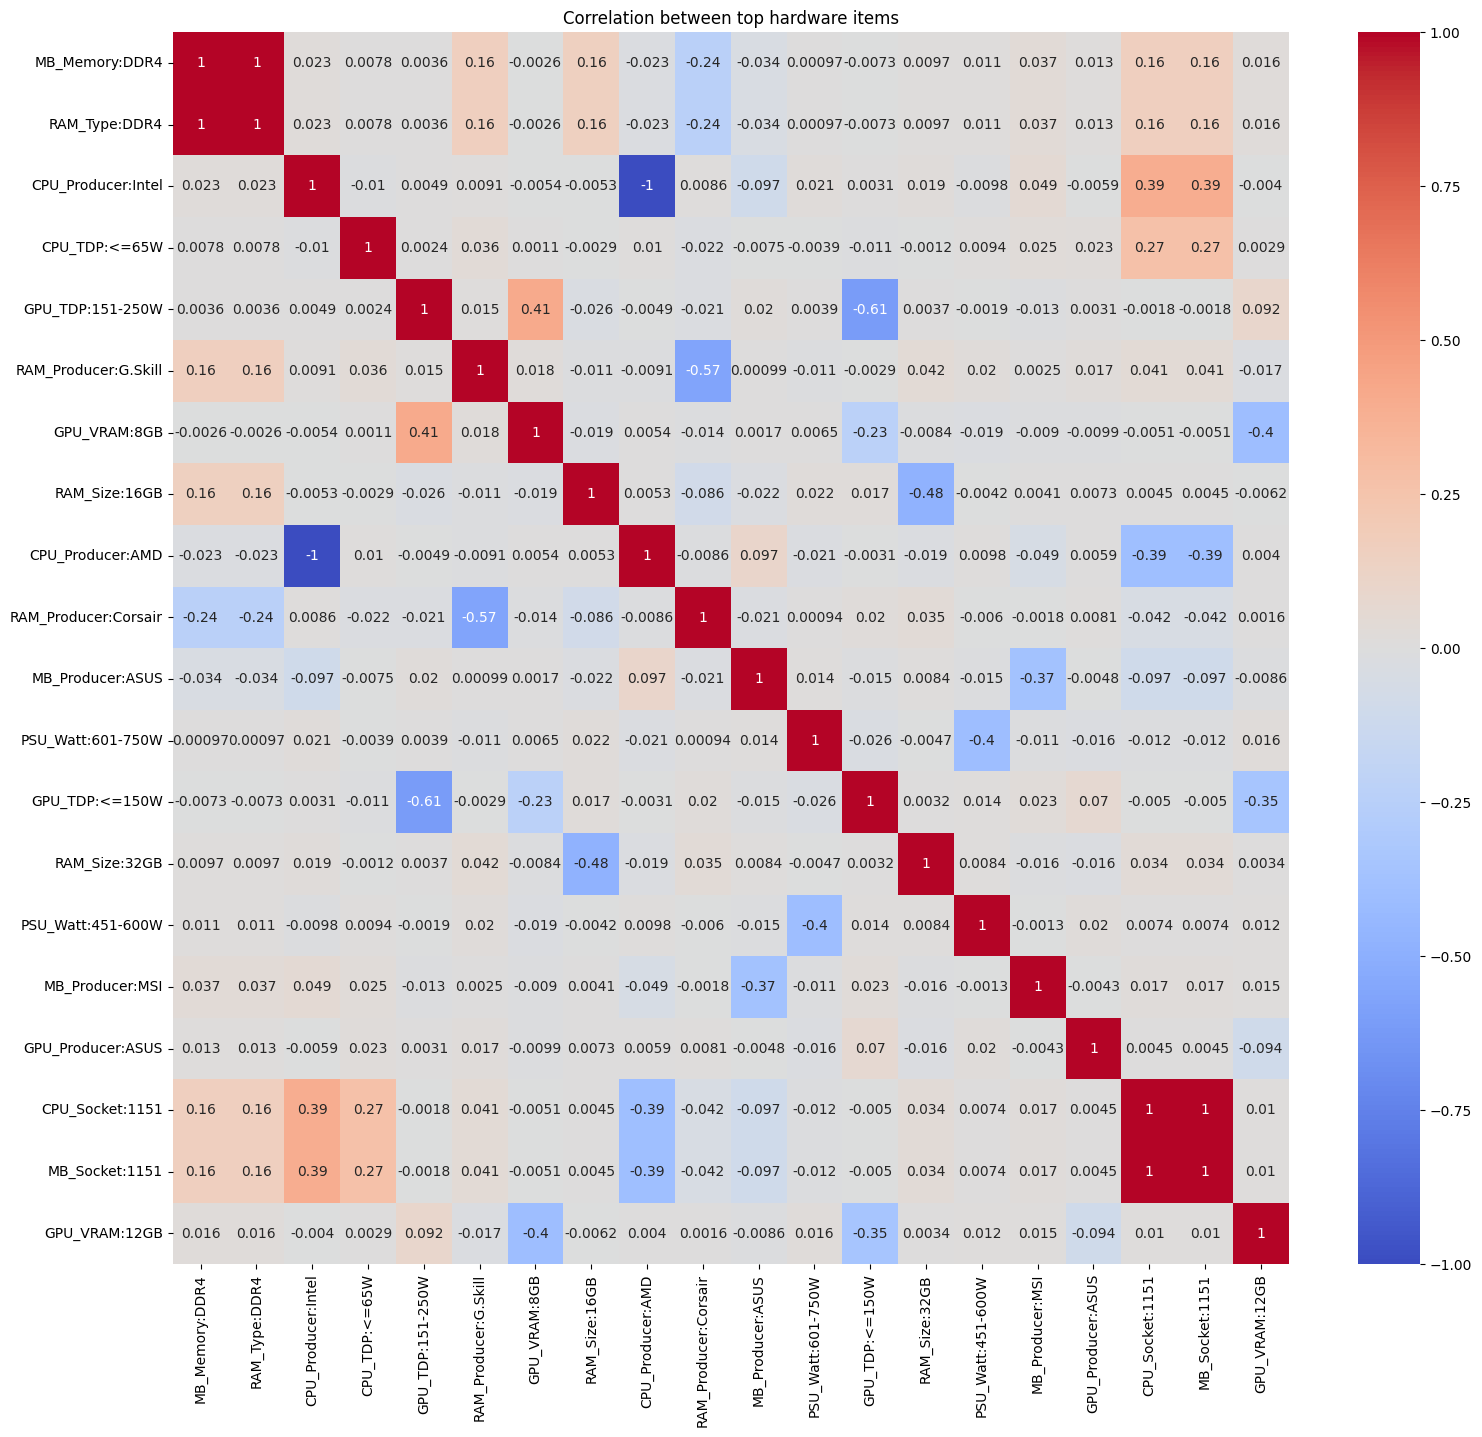

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation between top 20 items
top_cols = item_support.head(20).index
plt.figure(figsize=(18,16))
sns.heatmap(df[top_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between top hardware items")
plt.show()

Top 20 Frequent Items:
MB_Memory:DDR4          0.915667
RAM_Type:DDR4           0.915667
CPU_Producer:Intel      0.651000
CPU_TDP:<=65W           0.487167
GPU_TDP:151-250W        0.456500
RAM_Producer:G.Skill    0.386167
GPU_VRAM:8GB            0.371333
RAM_Size:16GB           0.355167
CPU_Producer:AMD        0.349000
RAM_Producer:Corsair    0.340333
MB_Producer:ASUS        0.324833
PSU_Watt:601-750W       0.319667
GPU_TDP:<=150W          0.309000
RAM_Size:32GB           0.297167
PSU_Watt:451-600W       0.256833
MB_Producer:MSI         0.224833
GPU_Producer:ASUS       0.223500
CPU_Socket:1151         0.223167
MB_Socket:1151          0.223167
GPU_VRAM:12GB           0.216000
dtype: float64

Basket Size Stats:
Mean: 15.0
Min: 15
Max: 15
Histogram:


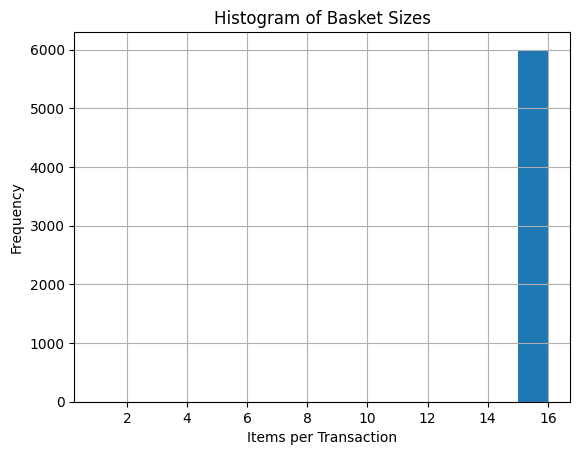


Top 10 Co-occurring Items:
MB_Memory:DDR4      RAM_Type:DDR4         0.915667
RAM_Type:DDR4       MB_Memory:DDR4        0.915667
MB_Memory:DDR4      CPU_Producer:Intel    0.599167
CPU_Producer:Intel  MB_Memory:DDR4        0.599167
RAM_Type:DDR4       CPU_Producer:Intel    0.599167
CPU_Producer:Intel  RAM_Type:DDR4         0.599167
MB_Memory:DDR4      CPU_TDP:<=65W         0.447167
RAM_Type:DDR4       CPU_TDP:<=65W         0.447167
CPU_TDP:<=65W       RAM_Type:DDR4         0.447167
                    MB_Memory:DDR4        0.447167
dtype: float64


In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Load your one-hot encoded dataset
df = pd.read_csv("../data/processed_data.csv")

# 1. Frequent Items
item_support = df.sum() / len(df)
top_items = item_support.sort_values(ascending=False).head(20)
print("Top 20 Frequent Items:")
print(top_items)

# 2. Basket Size Statistics
basket_sizes = df.sum(axis=1)
print("\nBasket Size Stats:")
print("Mean:", basket_sizes.mean())
print("Min:", basket_sizes.min())
print("Max:", basket_sizes.max())
print("Histogram:")
basket_sizes.hist(bins=range(1, basket_sizes.max()+2))
plt.xlabel("Items per Transaction")
plt.ylabel("Frequency")
plt.title("Histogram of Basket Sizes")
plt.show()

# 3. Co-occurrence (optional top 10 pairs)
co_occurrence = df.T.dot(df) / len(df)
co_occurrence_values = co_occurrence.where(~np.eye(co_occurrence.shape[0], dtype=bool))
top_co_occurrence = co_occurrence_values.unstack().sort_values(ascending=False).head(10)
print("\nTop 10 Co-occurring Items:")
print(top_co_occurrence)


### EDA Summary
- Dataset contains 600 realistic PC build transactions
- Average transaction size ≈ 15 items
- Dominant attributes include DDR4 memory, mid-range CPU TDP, and 8GB GPU VRAM
- Strong co-occurrence observed between:
  - CPU_Socket ↔ MB_Socket
  - RAM_Type ↔ MB_Memory
  - GPU_TDP ↔ PSU_Watt
These findings confirm the dataset is well-suited for association rule mining.